In [1]:
import warnings
warnings.simplefilter("ignore")

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Los modelos Ensembles realizan entrenamientos con submodelos para luego promediar el entrenamiento o tomar el más frecuente, para hacer la prediccion

Los algoritmos con casillas de más valor (color más intenso) son los mas recomendados.

<div class="alert alert-success">
    Según distintos benchmarks (papers, kaggle.com) los **algoritmos de uso general** que tienen más veces la mejor performance son: **Gradient Boosted Trees, Random Forest y SVM**.
</div>

<img src="../vol/img/benchmark_algs.png">

## Decision Trees

In [3]:
from sklearn.tree import DecisionTreeRegressor     #Arbol normal

model = DecisionTreeRegressor(max_depth=2)    #max_depht profundidad del arbol

In [4]:
from sklearn.model_selection import train_test_split

X = pd.read_csv('X_opening.csv')
y = X['worldwide_gross']
X = X.drop('worldwide_gross',axis=1)
X = X.drop('budget',axis=1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [6]:
model.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [7]:
import graphviz

In [8]:
from sklearn.tree import export_graphviz       #Exportar el grapho, para hacerlo compatible con graghviz

treedot = export_graphviz(model,
                         out_file=None,
                         feature_names=X.columns)

In [9]:
treedot       #Sin grachviz

'digraph Tree {\nnode [shape=box] ;\n0 [label="opening_gross <= 42520512.0\\nmse = 4.317194836730146e+16\\nsamples = 1642\\nvalue = 137722820.592"] ;\n1 [label="opening_gross <= 22074047.0\\nmse = 1.3666950687751852e+16\\nsamples = 1500\\nvalue = 93350921.809"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="mse = 5245377637828732.0\\nsamples = 1243\\nvalue = 63983310.656"] ;\n1 -> 2 ;\n3 [label="mse = 3.005220451257739e+16\\nsamples = 257\\nvalue = 235389601.436"] ;\n1 -> 3 ;\n4 [label="opening_gross <= 70284356.0\\nmse = 1.1435073341307494e+17\\nsamples = 142\\nvalue = 606440061.254"] ;\n0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n5 [label="mse = 3.693166293648493e+16\\nsamples = 85\\nvalue = 438524597.882"] ;\n4 -> 5 ;\n6 [label="mse = 1.2505386366560589e+17\\nsamples = 57\\nvalue = 856840313.649"] ;\n4 -> 6 ;\n}'

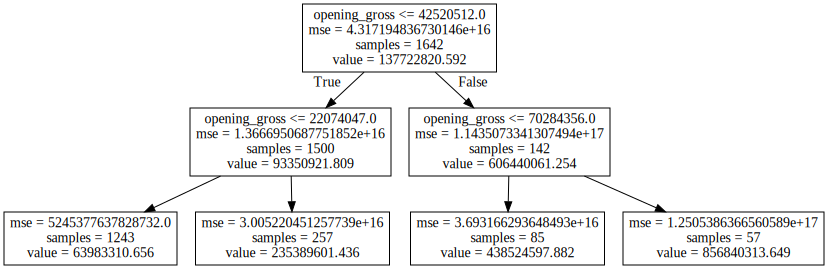

In [10]:
graphviz.Source(treedot)  #Con graghviz

Los Algoritmos de arbol son parecidos a una busqueda exhaustiva, voy a probar todas las features y luego para cada feature voy a dividir mis datos en dos, con una separación arbitraria, datos cuyo valor sean menor a uno y datos mayores a 1.

En caso de una clasificacion se debe predecir bien la clase. Y en caso de una regresion veo si el promedio apunta bien a las separaciones. 

Y por todo este analisis exhaustivo a traves de la features se escoge el mejor

Se tiene en cuenta la suma de las distancias cuadráticas en la regresión aplicada al árbol. Se elige la mejor 

Virtudes de los arboles de decision:

- Metodo poderoso y probado
- Interpretable
- No necesita escalar los datos (clasificación), y menos preprocesamiento de variables

Sin embargo en la practica existen modelos que obtienen mejor rendimiento. Como mejorar el modelo de arboles de decisión?

## Ensembles
**Concepto General**

Random Forest y Gradient Boosted Trees, forman parte de una familia de algoritmos que se denominan ensembles.

$$ Ensemble = Submodelos \rightarrow Entrenamiento \rightarrow Predicciones_{Intermedias} \rightarrow Voto \rightarrow Prediccion_{final}$$ 

Random Forest y Gradient Boosting Trees, son del tipo Modelo Ensemble, que son un conjunto de varios modelos que son entrenados por separado, para luego votar o se promedian para obtener una mejor predicción.

** Cómo funciona el algoritmo Random Forest?**

Vamos a generar cientos de modelos de arboles de decisión que serán entrenados sobre **conjuntos de datos bootstrapeados** del conjunto de datos original y donde para cada etapa de separación el **conjunto de features elegibles** sera un subconjunto aleatorio del conjunto original de features.

<img src="../vol/img/rf_tree.png" width="600">

Cada uno de los arboles entrenados luego podrá votar por su predicción y promediaremos estos votos.

<img src="../vol/img/random_forest.png" width="600">

**Ensembles del pobre ("Poor man's ensembles")**

- Entrenar diversos modelos a mano
- Promediar el resultado
- Owen Zhang, número 1 de Kaggle.com durante un largo tiempo, ocupaba esta estrategia promediando diversos modelos XGBoost.
- ``from sklearn.ensemble import VotingClassifier`` sirve por ejemplo para hacer un ensemble manual de clasificación

En general los ensembles del pobre funcionan ya que cada uno de los modelos que votarán en conjunto son bastante fuertes.

**Porqué RF es poderoso?**

<div class="alert alert-success">
  **Leo Breiman** creador del Random Forest demostró que un ensemble podía tener buen poder de generalización sí:
  <ol>
    <li>Los submodelos tienen buen poder de predicción</li>
    <li>Los submodelos están descorrelacionados</li>
    </ol>
</div>

Así el algoritmo de Random Forest compromete un poco de poder de predicción de cada uno de los decision trees que arma, pero la forma aleatoria de generarlos hace que esten **fuertemente descorrelacionados**.

In [11]:
from sklearn.ensemble import RandomForestRegressor   #Este modelo de arbol es para la regresion 
from sklearn.model_selection import cross_validate

forest = RandomForestRegressor(200)   #200 parametro (Cantidad de arboles que va a generar) 
results = cross_validate(forest,X,y,cv=5,scoring='r2',return_train_score=True)

In [12]:
results

{'fit_time': array([1.34109879, 1.32209897, 1.42010498, 1.33809876, 1.3320992 ]),
 'score_time': array([0.01800132, 0.01900101, 0.02600312, 0.02200174, 0.01900101]),
 'test_score': array([0.45106959, 0.6774337 , 0.58578484, 0.40839254, 0.45955881]),
 'train_score': array([0.96092374, 0.96489724, 0.96770015, 0.96264891, 0.96528162])}

In [13]:
test_scores = results['test_score']
train_scores = results['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores))

0.9642903325250514
0.5164478946208455


Mejor resultado que Lasso! Ya no tenemos Sesgo y tenemos un mejor score r2. Sin embargo tenemos una diferencia importante entre score de entrenamiento y de test (overfit).

El Lasso tenia sesgo, el modelo era demasiado simple, y aqui con el RandomForestRegressor el modelo es mas complejo y logra acercarse muy bien al train pero no lo estamos regularizando bien en sus parametros para que no overfitee

## Gradient Boosted Trees   (Utilizamos este por que es mas complejo y vamos a regualizar el overfit)

In [17]:
from sklearn.ensemble import GradientBoostingRegressor

ensemble = GradientBoostingRegressor()
results = cross_validate(ensemble,X,y,cv=5,scoring='r2',return_train_score=True)

In [18]:
test_scores = results['test_score']
train_scores = results['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores))

0.9144608683148601
0.5315940100689043


Cómo optimizamos los parametros de este último modelo?

## Optimización de hiperparametros

- Fijar un learning rate alto
- Fijar parametros de los arboles
- Fijados estos parametros, elegir el mejor numero de estimadores que conforman el ensemble
- (Tarea) Con el learning rate dado y el numero de estimadores óptimo, optimizar los parametros de los arboles

**Grid Search**

Por ahora dijimos que:
    
- train_test_split servia para evaluaciones rapidas, testeos y prototipaje
- cross_validate es un método más robusto para poder estimar el rendimiento de tu algoritmo

Sin embargo una vez que hemos finalizado nuestra etapa de prototipaje y ya queremos establecer un modelo definitivo deberiamos seguir el flujo siguiente.

<img src="../vol/img/grid_search_crossval.png" width=700>

Para la etapa final lo que se debe hacer es separar los datos, en datos de entrenamiento y datos de test, pero los de test se van a dejar aparte, solo se usarán al final para obtener el score que se entregará al interesado.
Para ver el score en las iteraciones se debe separar la parte de los datos de entrenamiento en un nuevo set de entrenamiento y en un set de datos de validación, de ésta forma podemos mejorar los parámetros y los score.

En resumen se tiene que los Gradient Boosting Grid son complejos de optimizar, aunque algunos Kaggle proporcionan la siguiente receta para lograr esto:

Elige primero un learning rate, que es uno de los parámetros del algoritmo, que sea aproximadamente 0.1.
Después fija todos los parámetros de árbol (recuerda que los GBG, los modelos de aprendizaje débil, son arboles) que sean relativamente buenos para esos pequeños arboles.
Luego, con GridSearch busca el mejor valor para la cantidad de estimadores.

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [42]:
from sklearn.model_selection import GridSearchCV

param_test1 = {'n_estimators': range(20,501,20)}

In [43]:
list(param_test1['n_estimators'])  #Se van a testear estos valores, para ver cual es el mejor 

[20,
 40,
 60,
 80,
 100,
 120,
 140,
 160,
 180,
 200,
 220,
 240,
 260,
 280,
 300,
 320,
 340,
 360,
 380,
 400,
 420,
 440,
 460,
 480,
 500]

In [44]:
estimator = GradientBoostingRegressor(learning_rate=0.1,
                                     min_samples_split=500,
                                     min_samples_leaf=50,
                                     max_depth=8,
                                     max_features='sqrt',
                                     subsample=0.8,
                                     random_state=10)

In [45]:
gsearch1 = GridSearchCV(estimator, 
                        param_grid = param_test1, 
                        scoring='r2', 
                        cv=5,
                        return_train_score = True)

In [46]:
gsearch1.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=8,
                                                 max_features='sqrt',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=50,
                                                 min_samples_split=500,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
            

In [47]:
list(zip(gsearch1.cv_results_['mean_test_score'], 
         gsearch1.cv_results_['std_test_score'], 
         gsearch1.cv_results_['params'])), gsearch1.best_params_, gsearch1.best_score_

([(0.6190451393262852, 0.07790466000268802, {'n_estimators': 20}),
  (0.6866996104035019, 0.0572125247531653, {'n_estimators': 40}),
  (0.6998873491605904, 0.049898530169396466, {'n_estimators': 60}),
  (0.7050046084079756, 0.04587990450263335, {'n_estimators': 80}),
  (0.7081158100185159, 0.043420317027916454, {'n_estimators': 100}),
  (0.7124807791392783, 0.04145433982947511, {'n_estimators': 120}),
  (0.7153633282508316, 0.04180856749234244, {'n_estimators': 140}),
  (0.7164224396160013, 0.040336257275822185, {'n_estimators': 160}),
  (0.7173562531963734, 0.03981294993202842, {'n_estimators': 180}),
  (0.7181921814130573, 0.0390702749330308, {'n_estimators': 200}),
  (0.7189062913607358, 0.03827933149592073, {'n_estimators': 220}),
  (0.718189319798347, 0.037150635458503625, {'n_estimators': 240}),
  (0.718511926981295, 0.03576211518782603, {'n_estimators': 260}),
  (0.718710543417778, 0.034760646805813, {'n_estimators': 280}),
  (0.7193820668878087, 0.035931731707671125, {'n_estima

In [27]:
#gsearch1.best_estimator_      #Nos da el resultado de arriba n_estimators: 280 

In [48]:
final_results = cross_validate(gsearch1.best_estimator_,X_train,y_train,return_train_score = True)

In [49]:
test_scores = final_results['test_score']      #Nuestra cross_validation llega a un asituacion ideal eliminamos el overfiting
train_scores = final_results['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores))

0.8265168662364198
0.7193820668878087


In [50]:
estimator = GradientBoostingRegressor(learning_rate=0.1,
                                     min_samples_split=500,
                                     min_samples_leaf=50,
                                     max_depth=8,
                                     max_features='sqrt',
                                     subsample=0.8,
                                     random_state=10,
                                     n_estimators=300)   #Poner el mejor estimador que se saco

In [51]:
estimator.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=8,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=50, min_samples_split=500,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=10, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [53]:
estimator.score(X_test,y_test)

0.7880420602428624

## Conclusión de todo el analisis, pasamos de un score de 40% a 78% en R2, gracias a haber trabajdo sobre las features, haber entendido si estaba funcionando nuestro 1er modelo, probar otros modelos y finalmente con GridSearchCv haber optimizado nuestros parametros de nuestro modelo 

## Reflexiones de cierre

** Recursos **

- Reddit /machinelearning y /learnmachinelearning
- Analytics Vidhya y KD Nuggets
- Kaggle.com y "There is no Free Hunch" Blog
- Arxiv, papers
- Libros: "Pattern Recognition and Machine Learning" C.Bishop y "Elements of Statistical Learning".

** Próximos pasos **

- Matemáticas
- Praxis: Feature Engineering, Model Selection y Tuning
- Deep Learning para NLP y Computer Vision
- Machine Learning Bayesiano